# Using pymssql to attach to MS Sql Server

You may have a set or tables (or better yet a view of cleaned data in MS SQL Server) and want to bring it in as a DataFrame. This simple .ipynb should be enough to get your started using the [pymssql library](https://pymssql.readthedocs.io/en/stable/index.html).

## Prior to editing and running this notebook, ensure the following:

1. You have a SQL account to connect to the database (i.e. you can't just use a Windows account as you can in SSMS). The account used in the example code below is `db_reader` and the password is `passme123`. Create an account such as this to access the desired database on your server. 
2. You have enabled TCP/IP in SQL Server Configuration Manager, if it is not enabled, your connection will fail. See image below:  

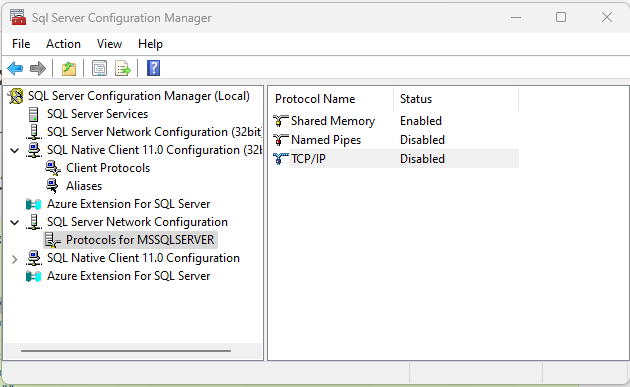

3. Test the output at each stage, when looping through each row in the cursor each row will be returned as a dictionary. This may not be the most efficient way to load the data, but gives you control over the data on the import and uses concepts you are comfortable with:  
* dictionaries (each returned row - test with print() if you like)
* lists (used to store each row in a dictionary format) 
* DataFrames (used to convert the list of dictionaries into a usable df)

In [ ]:
# uncomment and run this if not loaded...
# !pip install pymssql

In [1]:
import pandas as pd

In [2]:
import pymssql
conn = pymssql.connect('localhost', 'db_reader', 'passme123', 'Titanic')  
cursor = conn.cursor(as_dict=True)

In [3]:
lst = []
cursor.execute('SELECT p.* FROM dev.passengers p;')
for row in cursor:
    lst.append(row)
    
df = pd.DataFrame(lst)

In [4]:
# close your cursor, followed by your connection
cursor.close()
conn.close()

In [5]:
# access your df (sql results like any other df)
df

,ID,Gender,Boarded,Class,Yrs,Survived
0,1,0,2,3,26.0,1
1,2,0,1,3,42.0,0
2,3,1,1,3,39.0,1
3,4,0,1,3,16.0,0
4,5,0,1,3,14.0,0
...,...,...,...,...,...,...
1312,1313,1,1,2,24.0,0
1313,1314,0,2,3,27.0,0
1314,1315,0,2,3,22.0,0
1315,1316,0,2,3,22.0,1
